Loading the Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = "dataset.csv"  
data = pd.read_csv(file_path)

# Preview the data
print(data.head())

   Disaster_ID Disaster_Type   Location  Magnitude                 Date  \
0            1      Wildfire     Brazil   6.267393  2024-01-01 00:00:00   
1            2     Hurricane  Indonesia   6.649358  2024-01-01 01:00:00   
2            3       Tornado      China   9.724366  2024-01-01 02:00:00   
3            4         Flood      India   1.702505  2024-01-01 03:00:00   
4            5         Flood     Brazil   7.917748  2024-01-01 04:00:00   

   Fatalities  Economic_Loss($)  
0        9706      6.509790e+08  
1        2233      5.538357e+08  
2         478      6.910998e+07  
3        2867      8.474880e+08  
4         776      6.449297e+08  


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Date              10000 non-null  object 
 5   Fatalities        10000 non-null  int64  
 6   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB
None


In [3]:
print(data.describe())

       Disaster_ID     Magnitude    Fatalities  Economic_Loss($)
count  10000.00000  10000.000000  10000.000000      1.000000e+04
mean    5000.50000      5.559173   4984.928900      5.049752e+08
std     2886.89568      2.619304   2900.114029      2.861325e+08
min        1.00000      1.000656      0.000000      1.036597e+06
25%     2500.75000      3.263217   2481.750000      2.636352e+08
50%     5000.50000      5.589578   4947.000000      5.078407e+08
75%     7500.25000      7.829268   7511.250000      7.527256e+08
max    10000.00000      9.999671   9999.000000      9.998528e+08


Deleting Duplicate 

In [5]:

duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
data = data.drop_duplicates()
print(f"Shape after removing duplicates: {data.shape}")

Number of duplicate rows: 0
Shape after removing duplicates: (10000, 7)


Converting into DateTime format 

In [6]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
print(data['Date'].isnull().sum(), "invalid dates found")
print(data.info())

0 invalid dates found
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Disaster_ID       10000 non-null  int64         
 1   Disaster_Type     10000 non-null  object        
 2   Location          10000 non-null  object        
 3   Magnitude         10000 non-null  float64       
 4   Date              10000 non-null  datetime64[ns]
 5   Fatalities        10000 non-null  int64         
 6   Economic_Loss($)  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 547.0+ KB
None


Handle Missing values and or Invalid Values 

In [7]:
print(data.isnull().sum())
data = data.dropna()
data['Fatalities'] = data['Fatalities'].fillna(data['Fatalities'].median())


Disaster_ID         0
Disaster_Type       0
Location            0
Magnitude           0
Date                0
Fatalities          0
Economic_Loss($)    0
dtype: int64


Inspecting Columns and dropping columns

In [8]:

columns_to_drop = ['Disaster_ID'] 
data = data.drop(columns=columns_to_drop, axis=1)
print(data.columns)


Index(['Disaster_Type', 'Location', 'Magnitude', 'Date', 'Fatalities',
       'Economic_Loss($)'],
      dtype='object')


In [9]:

data['Economic_Loss($)'] = pd.to_numeric(data['Economic_Loss($)'], errors='coerce')
print(data['Economic_Loss($)'].isnull().sum())


0


Visualizations

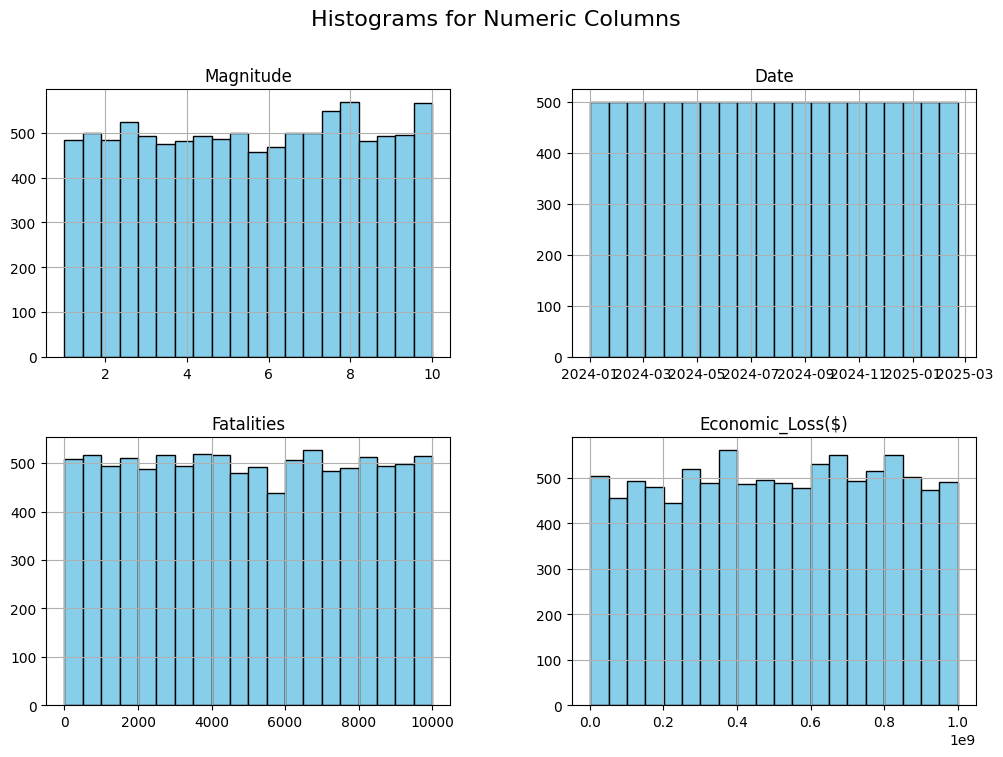

In [10]:
import matplotlib.pyplot as plt
data.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numeric Columns', fontsize=16)
plt.show()

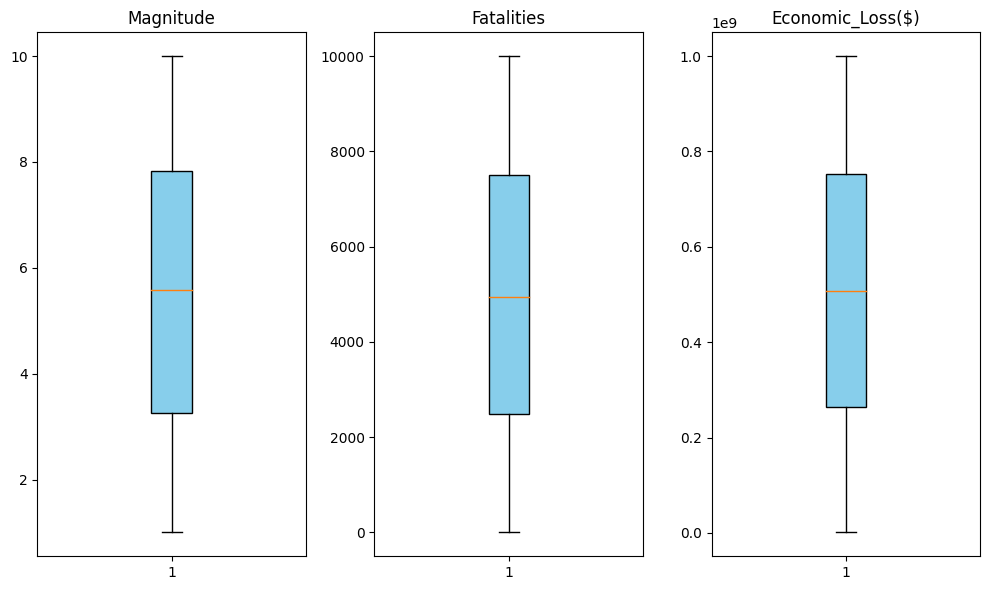

In [11]:
numeric_columns = ['Magnitude', 'Fatalities', 'Economic_Loss($)']

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    plt.boxplot(data[column], patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(column)

plt.tight_layout()
plt.show()


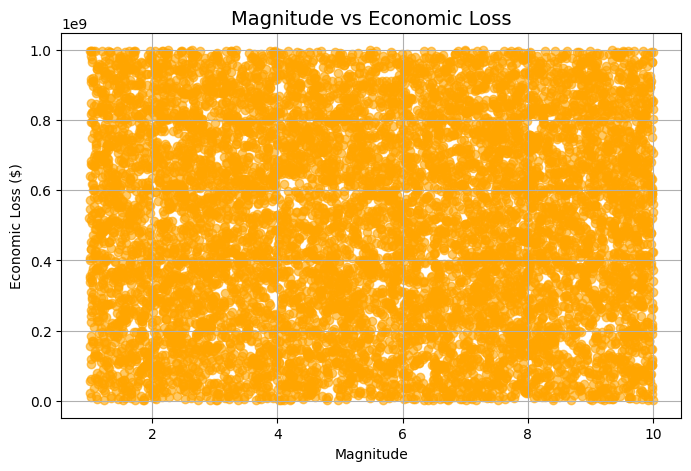

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Magnitude'], data['Economic_Loss($)'], alpha=0.6, c='orange')
plt.title('Magnitude vs Economic Loss', fontsize=14)
plt.xlabel('Magnitude')
plt.ylabel('Economic Loss ($)')
plt.grid(True)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_4720\205681177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)

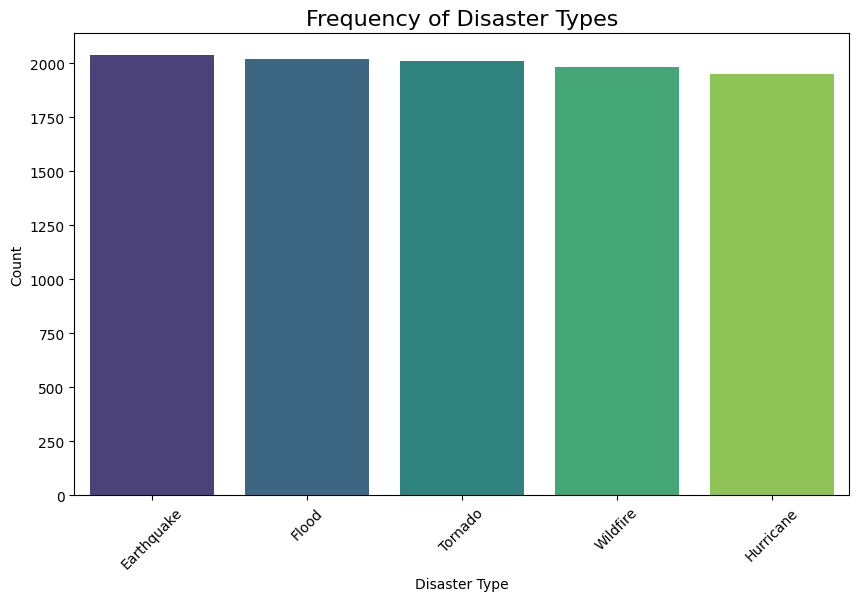

In [15]:
# Bar chart for Disaster Type
disaster_counts = data['Disaster_Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
plt.title('Frequency of Disaster Types', fontsize=16)
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Removing Outliers

In [17]:
Q1 = data['Economic_Loss($)'].quantile(0.25)
Q3 = data['Economic_Loss($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Economic_Loss($)'] >= lower_bound) & (data['Economic_Loss($)'] <= upper_bound)]


Mean Absoulute Error 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare data
X = data[['Magnitude', 'Fatalities']]
y = data['Economic_Loss($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))


Mean Absolute Error: 260453379.2961773


In [21]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Group by Location and Disaster_Type and count occurrences
location_disaster_counts = data.groupby(['Location', 'Disaster_Type']).size().reset_index(name='Count')

# Preview the result
print(location_disaster_counts.sort_values(by='Count', ascending=False).head())

     Location Disaster_Type  Count
3      Brazil       Tornado    372
0      Brazil    Earthquake    362
16  Indonesia         Flood    362
1      Brazil         Flood    354
13      India       Tornado    348


In [26]:

most_frequent_disasters = location_disaster_counts.loc[location_disaster_counts.groupby('Location')['Count'].idxmax()]
print(most_frequent_disasters)


     Location Disaster_Type  Count
3      Brazil       Tornado    372
6       China         Flood    344
13      India       Tornado    348
16  Indonesia         Flood    362
20      Japan    Earthquake    343
29        USA      Wildfire    337


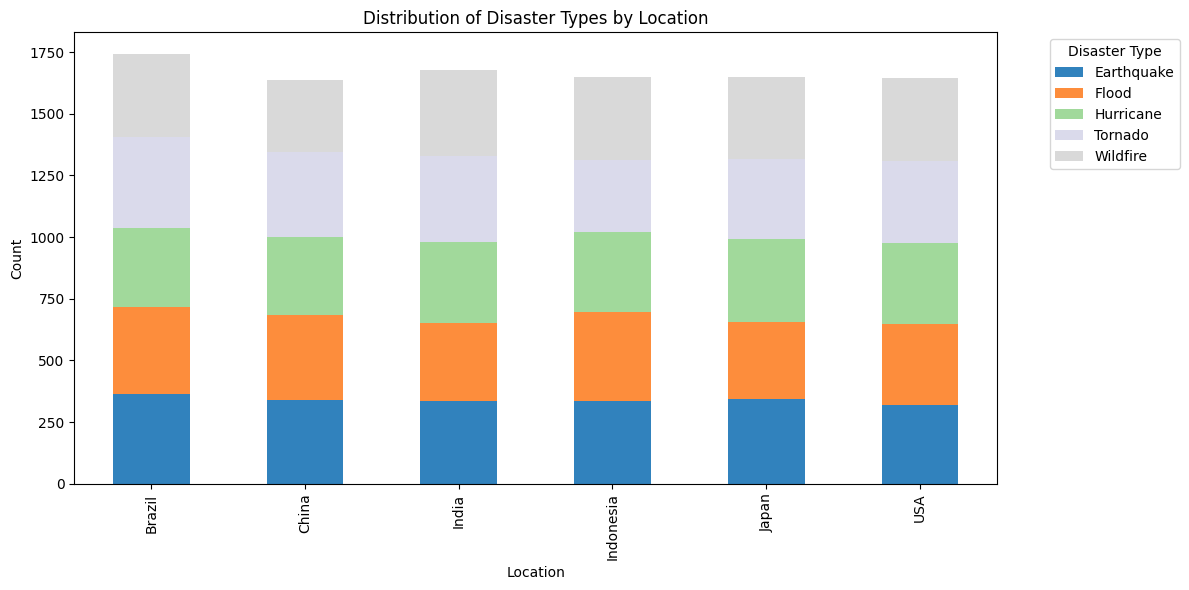

In [30]:
# Aggregate data for the stacked bar chart
stacked_data = data.groupby(['Location', 'Disaster_Type']).size().unstack(fill_value=0)

# Plot
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Distribution of Disaster Types by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


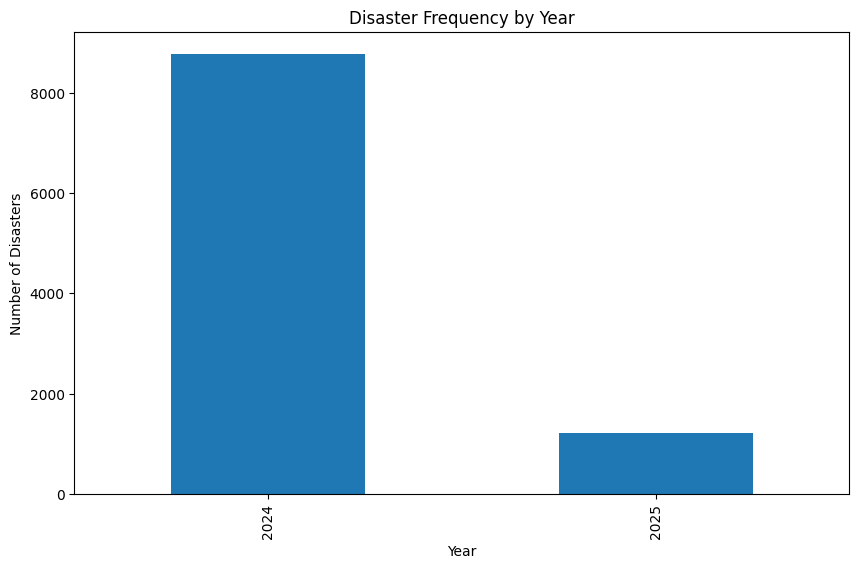

In [32]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Count disasters by year
disasters_per_year = data.groupby('Year').size()

# Plot
disasters_per_year.plot(kind='bar', figsize=(10, 6), title='Disaster Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.show()


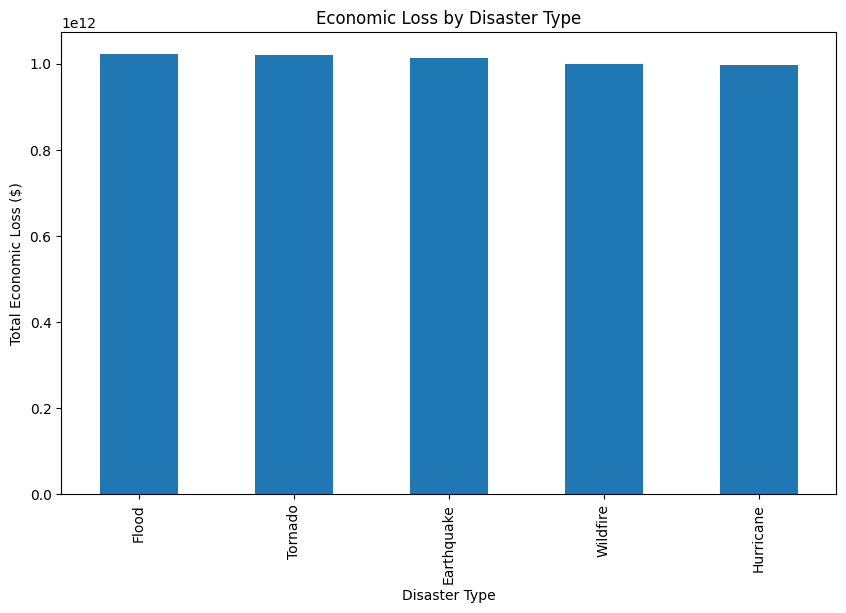

In [33]:
economic_loss_by_disaster = data.groupby('Disaster_Type')['Economic_Loss($)'].sum().sort_values(ascending=False)

# Plot
economic_loss_by_disaster.plot(kind='bar', figsize=(10, 6), title='Economic Loss by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Total Economic Loss ($)')
plt.show()


In [34]:
avg_magnitude_by_disaster = data.groupby('Disaster_Type')['Magnitude'].mean().sort_values(ascending=False)
print(avg_magnitude_by_disaster.head())

avg_magnitude_by_location = data.groupby('Location')['Magnitude'].mean().sort_values(ascending=False)
print(avg_magnitude_by_location.head())


Disaster_Type
Wildfire      5.609703
Earthquake    5.596137
Tornado       5.561685
Flood         5.545845
Hurricane     5.480502
Name: Magnitude, dtype: float64
Location
Japan        5.635935
Brazil       5.626127
USA          5.616253
Indonesia    5.550292
India        5.476548
Name: Magnitude, dtype: float64


                  Magnitude  Fatalities  Economic_Loss($)
Magnitude          1.000000   -0.030107         -0.003289
Fatalities        -0.030107    1.000000          0.008628
Economic_Loss($)  -0.003289    0.008628          1.000000


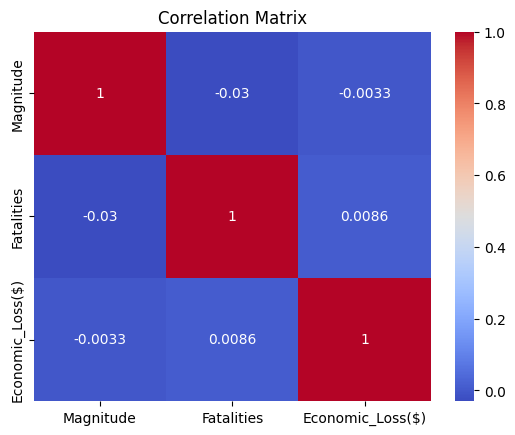

In [35]:
correlation_matrix = data[['Magnitude', 'Fatalities', 'Economic_Loss($)']].corr()
print(correlation_matrix)

# Heatmap of correlations
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [36]:
outliers = data[(data['Magnitude'] > data['Magnitude'].quantile(0.95)) |
                (data['Fatalities'] > data['Fatalities'].quantile(0.95)) |
                (data['Economic_Loss($)'] > data['Economic_Loss($)'].quantile(0.95))]
print(outliers)


     Disaster_Type Location  Magnitude                Date  Fatalities  \
0         Wildfire   Brazil   6.267393 2024-01-01 00:00:00        9706   
2          Tornado    China   9.724366 2024-01-01 02:00:00         478   
9            Flood    India   1.024187 2024-01-01 09:00:00        5135   
24        Wildfire      USA   2.211183 2024-01-02 00:00:00        9780   
25           Flood    China   2.003896 2024-01-02 01:00:00        2415   
...            ...      ...        ...                 ...         ...   
9975         Flood    China   8.118341 2025-02-19 15:00:00        9757   
9983       Tornado    China   3.095616 2025-02-19 23:00:00        9679   
9988       Tornado    Japan   9.213056 2025-02-20 04:00:00        9599   
9990    Earthquake    China   9.098895 2025-02-20 06:00:00        6532   
9998         Flood      USA   6.381571 2025-02-20 14:00:00         323   

      Economic_Loss($)  Cluster  Year  Month  
0         6.509790e+08        0  2024      1  
2         6.91099

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Normalized_Magnitude', 'Normalized_Fatalities', 'Normalized_Economic_Loss']] = scaler.fit_transform(
    data[['Magnitude', 'Fatalities', 'Economic_Loss($)']])
data['Risk_Index'] = data[['Normalized_Magnitude', 'Normalized_Fatalities', 'Normalized_Economic_Loss']].mean(axis=1)

print(data[['Disaster_Type', 'Location', 'Risk_Index']].sort_values(by='Risk_Index', ascending=False).head())


     Disaster_Type   Location  Risk_Index
5901      Wildfire  Indonesia    0.987050
8120         Flood      China    0.972404
9726    Earthquake      India    0.958911
4563    Earthquake     Brazil    0.949215
3560    Earthquake        USA    0.948138
